<a href="https://colab.research.google.com/github/manasamadgul/Pytorch_Fundamentals/blob/main/Classifier_DogOrCat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#id first_training
#caption Results from the first training
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 146MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.167725,0.014575,0.004060,00:47


epoch,train_loss,valid_loss,error_rate,time
0,0.058991,0.018232,0.006766,00:48


In [5]:
#hide_output
import ipywidgets as widgets # Import the ipywidgets module and alias it as 'widgets'

uploader = widgets.FileUpload()
uploader


FileUpload(value={}, description='Upload')

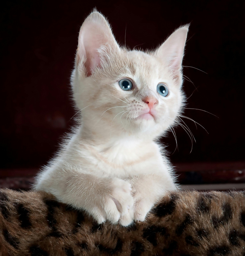

In [8]:
from fastai.vision.all import *
import io
im = Image.open(io.BytesIO(uploader.data[0]))
im.to_thumb(256,256)

In [13]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")


Is this a cat?: True.
Probability it's a cat: 1.000000
